Training Accuracy: 1.0
Test Accuracy: 0.6888888888888889
Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.55      0.57        42
           0       0.62      0.69      0.65        42
           1       0.82      0.80      0.81        51

    accuracy                           0.69       135
   macro avg       0.68      0.68      0.68       135
weighted avg       0.69      0.69      0.69       135

Confusion Matrix:
[[23 12  7]
 [11 29  2]
 [ 4  6 41]]


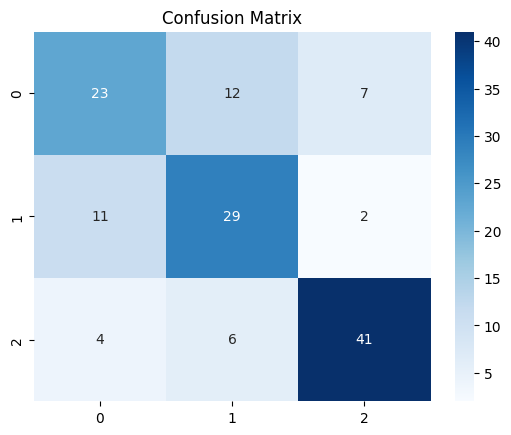

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Training Time: 5232.064390182495 seconds


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load Data
X = np.load("/kaggle/input/seed-fe-own/Shuffled/Time/shuffled_X.npy")
y = np.load("/kaggle/input/seed-fe-own/Shuffled/Time/shuffled_y.npy")

# Flatten the features
X_shape = X.shape
X = X.reshape((X_shape[0], -1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Use GridSearchCV to find the best hyperparameters and measure the training time
start_time = time.time()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("Classification Report:")
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Seaborn Heatmap for Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Print the training time
print("Training Time:", training_time, "seconds")
